choose learning rate using lrfind, which implements cyclical learning rate paper (L Smith 2017). The finder starts with a small learning rate and doubles it each time. The idea is to plot learning rate (lrsched plot) against loss and pick a rate where loss is decreasing but before turning point where it all goes bad (because learning rate has been increased to much and is blowing up)

In [46]:
x = [1,2,3,4,5]
for k in range(1,len(x)+1):
    print(str(k))

1
2
3
4
5


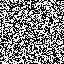

In [2]:
# turn array into image:

from PIL import Image
from IPython.display import display

import random
data = [random.randint(0, 1) for i in range(64 * 64)]

img = Image.new('1', (64, 64))
img.putdata(data)
# img.save('my.png')

display(img)

In [3]:
data

[1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,


In [4]:
from controller.game import GameController
from view.consolegui import ConsoleGui
from model.aiplayer import AiPlayer
from model.bag import Bag
from model.config import Direction
from model.row import Row
import numpy as np
from model.config import LETTER_VALUES, NO_CROSS_WORD, RACK_SIZE, BONUS

In [5]:
players = [None, None]
bag = Bag()
game = GameController(players, bag)
gui = ConsoleGui(game)
player1 = AiPlayer(game, gui, "AI Player 1")
player2 = AiPlayer(game, gui, "AI Player 2")
game.players = [player1, player2]
game.active_player = player2
board = game.board
lex = game.lexicon
validator = game.validator
board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | ' . . - . . . ' . . . - . . ' |
13 | . . - . . . ' . ' . . . - . . |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [6]:
game.start_game()

Waiting for players
Starting game
Score: [AI Player 2: 0][AI Player 1: 0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - . . . ' . ' . . . - . . |
 4 | ' . . - . . . ' . . . - . . ' |
 5 | . . . . - . . . . . - . . . . |
 6 | . " . . . " . . . " . . . " . |
 7 | . . ' . . . ' . ' . . . ' . . |
 8 | = . . ' . . . - . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | ' . . - . . . ' . . . - . . ' |
13 | . . - . . . ' . ' . . . - . . |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: PDSRANN

Score: [AI Player 2: 0][AI Player 1: 0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " . . . - . |
 3 | . . - .

Score: [AI Player 2: 74.0][AI Player 1: 97.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " H A . - . |
 3 | . . - . . . V E R R E L S . . |
 4 | ' . . - . . . ' . . X I . . ' |
 5 | . . . . - . . . . . E F . . . |
 6 | . " . . . " R I N K s . . " . |
 7 | . . A U L O I . ' . . . ' . . |
 8 | = . . P A N D S . . . ' . . = |
 9 | . . ' . . . ' . ' . . . ' . . |
10 | . " . . . " . . . " . . . " . |
11 | . . . . - . . . . . - . . . . |
12 | ' . . - . . . ' . . . - . . ' |
13 | . . - . . . ' . ' . . . - . . |
14 | . - . . . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: TORIYLT

Score: [AI Player 2: 74.0][AI Player 1: 97.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . = . . . . ' . = |
 2 | . - . . . " . . . " H A . - . |
 3 | . . - . . . V E R R E L S . .

Score: [AI Player 2: 165.0][AI Player 1: 196.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T . . . . ' . = |
 2 | . - . . . " . R . " H A . - . |
 3 | . . - . . . V E R R E L S . . |
 4 | ' . . - . . . Y . . X I . . ' |
 5 | . . . . - . . . . . E F . . . |
 6 | . Z A G . B R I N K s . . " . |
 7 | . . A U L O I . ' . . . ' . . |
 8 | = . . P A N D S . . . ' . . = |
 9 | . . ' . . N ' . ' . . . ' . . |
10 | . " . . D E . . . " . . . " . |
11 | . . . . I T . . . . - . . . . |
12 | ' . . J O . . ' . . . - . . ' |
13 | . . H A L L I O N . . . - . . |
14 | . - . G . " . . . " . . . - . |
15 | = . . ' . . . = . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: TIIINOE

Score: [AI Player 2: 165.0][AI Player 1: 196.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T . . . . ' . = |
 2 | . - . . . " . R . " H A . - . |
 3 | . . - . . . V E R R E L S

Score: [AI Player 2: 262.0][AI Player 1: 264.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T A . . . D A E |
 2 | . - . . . " . R E " H A I N T |
 3 | . . - . . . V E R R E L S . . |
 4 | ' . . - . . . Y O . X I . . ' |
 5 | . . . . - . . . . . E F . . . |
 6 | . Z A G . B R I N K s . . " . |
 7 | . . A U L O I . ' . . . ' . . |
 8 | = . . P A N D S . . . ' . . = |
 9 | . . ' . . N ' . ' . . . ' . . |
10 | . " . . D E . I . " . . . " . |
11 | . . . . I T . N . . - . . . . |
12 | Q . . J O . . W . . . - . . ' |
13 | U . H A L L I O N . . . - . . |
14 | I - . G . " . V . " . . . - . |
15 | T O I S E . . E . . . . ' . = |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: MaTROEE

Score: [AI Player 2: 262.0][AI Player 1: 264.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T A . . . D A E |
 2 | . - . . . " . R E " H A I N T |
 3 | . . - . . . V E R R E L S

Score: [AI Player 2: 380.0][AI Player 1: 340.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T A . R . D A E |
 2 | . - . . . " . R E " H A I N T |
 3 | . . - . . . V E R R E L S . . |
 4 | ' . . - . . . Y O . X I . . ' |
 5 | . . . . - . . . . . E F T S . |
 6 | . Z A G . B R I N K s . W E . |
 7 | . . A U L O I . ' . . . P A . |
 8 | = . . P A N D S . . . ' . . = |
 9 | . . ' . . N ' . ' . . . ' . . |
10 | . " . . D E . I . " . . . " . |
11 | . . . . I T . N . . - . . . . |
12 | Q . . J O . . W . . . - . . ' |
13 | U . H A L L I O N . . F U G U |
14 | I - . G . " . V . Y A E . - . |
15 | T O I S E . . E R O T E M E s |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O
AI Player 2 rack: MBCD

Score: [AI Player 2: 380.0][AI Player 1: 340.0]

     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T A . R . D A E |
 2 | . - . . . " . R E " H A I N T |
 3 | . . - . . . V E R R E L S . 

In [7]:
board

GameBoard object:
     A B C D E F G H I J K L M N O
   + - - - - - - - - - - - - - - - +
 1 | = . . ' . . . T A . R . D A E |
 2 | . - . . . " . R E " H A I N T |
 3 | . . - . . . V E R R E L S . . |
 4 | ' . . - . . . Y O . X I . . ' |
 5 | . . . . - . . . . . E F T S . |
 6 | . Z A G . B R I N K s . W E . |
 7 | . . A U L O I . ' . . . P A C |
 8 | = . . P A N D S . . . ' . . O |
 9 | . . ' . . N ' . ' . . . ' . O |
10 | . " . . D E . I . " . . . " . |
11 | . . . . I T . N . . - . . . . |
12 | Q . . J O . . W . . . - . . ' |
13 | U . H A L L I O N . . F U G U |
14 | I D . G . " . V . Y A E . - . |
15 | T O I S E . . E R O T E M E s |
   + - - - - - - - - - - - - - - - +
     A B C D E F G H I J K L M N O

In [8]:
arr = board.existing_letters[1:-1].T[1:-1] # slice off sentinels
arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17, 21,  9, 20],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  4, 15],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  8,  0,  9],
       [ 0,  0,  0,  0,  0,  7, 21, 16,  0,  0,  0, 10,  1,  7, 19],
       [ 0,  0,  0,  0,  0,  0, 12,  1,  0,  4,  9, 15, 12,  0,  5],
       [ 0,  0,  0,  0,  0,  2, 15, 14, 14,  5, 20,  0, 12,  0,  0],
       [ 0,  0, 22,  0,  0, 18,  9,  4,  0,  0,  0,  0,  9,  0,  0],
       [20, 18,  5, 25,  0,  9,  0, 19,  0,  9, 14, 23, 15, 22,  5],
       [ 1,  5, 18, 15,  0, 14,  0,  0,  0,  0,  0,  0, 14,  0, 18],
       [ 0,  0, 18,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0, 25, 15],
       [18,  8,  5, 24,  5, 51,  0,  0,  0,  0,  0,  0,  0,  1, 20],
       [ 0,  1, 12,  9,  6,  0,  0,  0,  0,  0,  0,  0,  6,  5,  5],
       [ 4,  9, 19,  0, 20, 23, 16,  0,  0,  0,  0,  0, 21,  0, 13],
       [ 1, 14,  0,  0, 19,  5,  1,  0,  0,  0,  0,  0,  7,  0,  5],
       [ 5, 20,  0,  0,  0,  0,  3

In [9]:
ord('S')-ord('s')

-32

In [10]:
# change blanks to normal:
arr2 = arr + (arr>26).astype(int)*-32
arr2

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17, 21,  9, 20],
       [ 0,  0,  0,  0,  0, 26,  0,  0,  0,  0,  0,  0,  0,  4, 15],
       [ 0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  8,  0,  9],
       [ 0,  0,  0,  0,  0,  7, 21, 16,  0,  0,  0, 10,  1,  7, 19],
       [ 0,  0,  0,  0,  0,  0, 12,  1,  0,  4,  9, 15, 12,  0,  5],
       [ 0,  0,  0,  0,  0,  2, 15, 14, 14,  5, 20,  0, 12,  0,  0],
       [ 0,  0, 22,  0,  0, 18,  9,  4,  0,  0,  0,  0,  9,  0,  0],
       [20, 18,  5, 25,  0,  9,  0, 19,  0,  9, 14, 23, 15, 22,  5],
       [ 1,  5, 18, 15,  0, 14,  0,  0,  0,  0,  0,  0, 14,  0, 18],
       [ 0,  0, 18,  0,  0, 11,  0,  0,  0,  0,  0,  0,  0, 25, 15],
       [18,  8,  5, 24,  5, 19,  0,  0,  0,  0,  0,  0,  0,  1, 20],
       [ 0,  1, 12,  9,  6,  0,  0,  0,  0,  0,  0,  0,  6,  5,  5],
       [ 4,  9, 19,  0, 20, 23, 16,  0,  0,  0,  0,  0, 21,  0, 13],
       [ 1, 14,  0,  0, 19,  5,  1,  0,  0,  0,  0,  0,  7,  0,  5],
       [ 5, 20,  0,  0,  0,  0,  3

In [11]:
arr2 = arr2*9

In [12]:
arr2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 153, 189,
         81, 180],
       [  0,   0,   0,   0,   0, 234,   0,   0,   0,   0,   0,   0,   0,
         36, 135],
       [  0,   0,   0,   0,   0,   9,   9,   0,   0,   0,   0,   0,  72,
          0,  81],
       [  0,   0,   0,   0,   0,  63, 189, 144,   0,   0,   0,  90,   9,
         63, 171],
       [  0,   0,   0,   0,   0,   0, 108,   9,   0,  36,  81, 135, 108,
          0,  45],
       [  0,   0,   0,   0,   0,  18, 135, 126, 126,  45, 180,   0, 108,
          0,   0],
       [  0,   0, 198,   0,   0, 162,  81,  36,   0,   0,   0,   0,  81,
          0,   0],
       [180, 162,  45, 225,   0,  81,   0, 171,   0,  81, 126, 207, 135,
        198,  45],
       [  9,  45, 162, 135,   0, 126,   0,   0,   0,   0,   0,   0, 126,
          0, 162],
       [  0,   0, 162,   0,   0,  99,   0,   0,   0,   0,   0,   0,   0,
        225, 135],
       [162,  72,  45, 216,  45, 171,   0,   0,   0,   0,   0,   0,   0,
       

In [13]:
arr2.flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 153, 189,
        81, 180,   0,   0,   0,   0,   0, 234,   0,   0,   0,   0,   0,
         0,   0,  36, 135,   0,   0,   0,   0,   0,   9,   9,   0,   0,
         0,   0,   0,  72,   0,  81,   0,   0,   0,   0,   0,  63, 189,
       144,   0,   0,   0,  90,   9,  63, 171,   0,   0,   0,   0,   0,
         0, 108,   9,   0,  36,  81, 135, 108,   0,  45,   0,   0,   0,
         0,   0,  18, 135, 126, 126,  45, 180,   0, 108,   0,   0,   0,
         0, 198,   0,   0, 162,  81,  36,   0,   0,   0,   0,  81,   0,
         0, 180, 162,  45, 225,   0,  81,   0, 171,   0,  81, 126, 207,
       135, 198,  45,   9,  45, 162, 135,   0, 126,   0,   0,   0,   0,
         0,   0, 126,   0, 162,   0,   0, 162,   0,   0,  99,   0,   0,
         0,   0,   0,   0,   0, 225, 135, 162,  72,  45, 216,  45, 171,
         0,   0,   0,   0,   0,   0,   0,   9, 180,   0,   9, 108,  81,
        54,   0,   0,   0,   0,   0,   0,   0,  54,  45,  45,  3

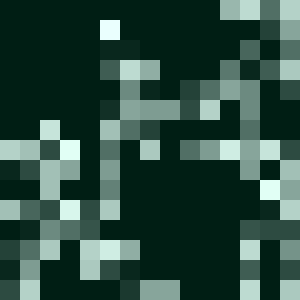

In [14]:
arr4 = [(a,a+30,a+20) for a in arr2.flatten()]
img = Image.new('RGB', (15, 15))
img.putdata(arr4)
img = img.resize((300,300))
img.save('myboard.png')
display(img)

In [15]:
arr3 = np.repeat(arr2,5)

### 

In [16]:
im2 = Image.new('P', (15, 15))
im2.putdata(arr2.flatten())
im2.save('myboard.png')
display(im2)

In [17]:
arr2.flatten()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 153, 189,
        81, 180,   0,   0,   0,   0,   0, 234,   0,   0,   0,   0,   0,
         0,   0,  36, 135,   0,   0,   0,   0,   0,   9,   9,   0,   0,
         0,   0,   0,  72,   0,  81,   0,   0,   0,   0,   0,  63, 189,
       144,   0,   0,   0,  90,   9,  63, 171,   0,   0,   0,   0,   0,
         0, 108,   9,   0,  36,  81, 135, 108,   0,  45,   0,   0,   0,
         0,   0,  18, 135, 126, 126,  45, 180,   0, 108,   0,   0,   0,
         0, 198,   0,   0, 162,  81,  36,   0,   0,   0,   0,  81,   0,
         0, 180, 162,  45, 225,   0,  81,   0, 171,   0,  81, 126, 207,
       135, 198,  45,   9,  45, 162, 135,   0, 126,   0,   0,   0,   0,
         0,   0, 126,   0, 162,   0,   0, 162,   0,   0,  99,   0,   0,
         0,   0,   0,   0,   0, 225, 135, 162,  72,  45, 216,  45, 171,
         0,   0,   0,   0,   0,   0,   0,   9, 180,   0,   9, 108,  81,
        54,   0,   0,   0,   0,   0,   0,   0,  54,  45,  45,  3

In [18]:
imt = im2.transpose(Image.TRANSPOSE)
imt.save('transboard.png')
display(imt)

In [19]:
imt = imt.resize((300,300))

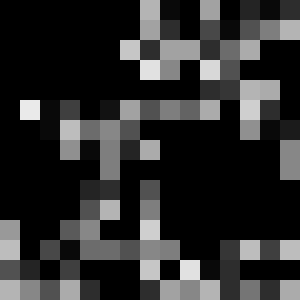

In [20]:
display(imt)

In [33]:
arr4 = [(a,a,a) for a in arr2.flatten()]

In [42]:
arr4[3] = (255,0,0)

##### arr4


In [43]:
np.shape(arr4)

(225, 3)

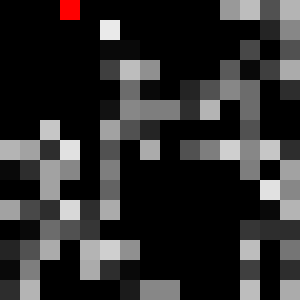

In [44]:

im2 = Image.new('RGB', (15, 15))
im2.putdata(arr4)
im2 = im2.resize((300,300))
display(im2)